# Final Project - Supervised Learning

Hello! This is my final project for *DTSA 5509 Introduction to Machine Learning: Supervised Learning*. I am using the data from the UCI Machine Learning Repository https://archive.ics.uci.edu/ 

I am using Bank Marketing (with social/economic context) Data Set that has the following description:
    *This dataset is using "in-vehicle coupon recommendation Data Set" UCI dataset.*
    
With the following 
            Attribute Information:

        destination: No Urgent Place, Home, Work
        passanger: Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)
        weather: Sunny, Rainy, Snowy
        temperature:55, 80, 30
        time: 2PM, 10AM, 6PM, 7AM, 10PM
        coupon: Restaurant(<$20), Coffee House, Carry out & Take away, Bar, Restaurant($20-$50)
    expiration: 1d, 2h (the coupon expires in 1 day or in 2 hours)
    gender: Female, Male
    age: 21, 46, 26, 31, 41, 50plus, 36, below21
    maritalStatus: Unmarried partner, Single, Married partner, Divorced, Widowed
    has_Children:1, 0
    education: Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School
    occupation: Unemployed, Architecture & Engineering, Student,
    Education&Training&Library, Healthcare Support,
    Healthcare Practitioners & Technical, Sales & Related, Management,
    Arts Design Entertainment Sports & Media, Computer & Mathematical,
    Life Physical Social Science, Personal Care & Service,
    Community & Social Services, Office & Administrative Support,
    Construction & Extraction, Legal, Retired,
    Installation Maintenance & Repair, Transportation & Material Moving,
    Business & Financial, Protective Service,
    Food Preparation & Serving Related, Production Occupations,
    Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry
    income: $37500 - $49999, $62500 - $74999, $12500 - $24999, $75000 - $87499,
    $50000 - $62499, $25000 - $37499, $100000 or More, $87500 - $99999, Less than $12500
    Bar: never, less1, 1~3, gt8, nan4~8 (feature meaning: how many times do you go to a bar every month?)
    CoffeeHouse: never, less1, 4~8, 1~3, gt8, nan (feature meaning: how many times do you go to a coffeehouse every month?)
    CarryAway:n4~8, 1~3, gt8, less1, never (feature meaning: how many times do you get take-away food every month?)
    RestaurantLessThan20: 4~8, 1~3, less1, gt8, never (feature meaning: how many times do you go to a restaurant with an average expense per person of less than $20 every month?)
    Restaurant20To50: 1~3, less1, never, gt8, 4~8, nan (feature meaning: how many times do you go to a restaurant with average expense per person of $20 - $50 every month?)
    toCoupon_GEQ15min:0,1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 15 minutes)
    toCoupon_GEQ25min:0, 1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 25 minutes)
    direction_same:0, 1 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
    direction_opp:1, 0 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
    Y:1, 0 (whether the coupon is accepted)
Source: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Citation: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

# Project Summary

## Objective
I want to use this data to help predict the conditions and personal traits for people that take coupons when they are driving past. This will help the employees of those companies to better give out those coupons and to avoid conditions where people are less likely to accept them. The data includes both personal traits, weather conditions, and range of the establishment from the place that coupons are being given out. 

## Main model
The main model I will use is a Decision Tree Classifier as it utilizes all the features provided in the data, and will also help me to find the most important features. 

Note: While deciding when and where to give out coupons the employees will not be able to have personal trait details, but given the insight into the data we will be able to at least provide them with insight into external factors. 

## Import Libraries and Data
We start with importing necessary libraries:

In [1]:
%matplotlib inline
!pip install scikit-learn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn import tree

Source: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### Data Import

We then import the data from the data file:

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00603/in-vehicle-coupon-recommendation.csv')

Below we see a sample of the data

In [3]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


There doesn't seem to be any NULL values but they are set to unknown

In [4]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


We initially have 25 features with 12684 rows, as we go through data cleaning this may change. Please find the description for each feature above.

### Data Cleaning

We want to find the columns that have null values and the course of action for each.

In [5]:
for c in df.columns:
    if(df[c].isnull().sum() / len(df) >0 and df[c].isnull().sum() / len(df) <= .05):
        print("Impute column '",c, "'  - Percenteage of null values: ", df[c].isnull().sum() / len(df))
    elif (df[c].isnull().sum() / len(df)) > .05:
        print("Drop column '", c, "'  - Percenteage of null values: ", df[c].isnull().sum() / len(df))

Drop column ' car '  - Percenteage of null values:  0.9914853358561968
Impute column ' Bar '  - Percenteage of null values:  0.008435824660990224
Impute column ' CoffeeHouse '  - Percenteage of null values:  0.017108167770419427
Impute column ' CarryAway '  - Percenteage of null values:  0.011904761904761904
Impute column ' RestaurantLessThan20 '  - Percenteage of null values:  0.010249132765689057
Impute column ' Restaurant20To50 '  - Percenteage of null values:  0.014900662251655629


The column `car` has 99.14% missing values so it needs to be dropped as it is above the 5% acceptable null values. The rest of the columns that contain null values can be imputed with the mode of each as they are all categorical columns.  

In [6]:
# Drop column 'car'
df = df.drop(columns=['car'])

In [7]:
#Impute the remaining columns with null values
cols = df.columns
feats_w_null = []
for c in df.columns:
    if df[c].isnull().sum() > 0:
        feats_w_null.append(c)


print(feats_w_null)


['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


In [8]:
#For each column in feats_w_null we get the mode and replace all null values with the most common entry

for x in feats_w_null:
    replacement = df[x].mode()
    df[x].fillna(replacement[0], inplace=True)
    print("Filled nulls for", x)


Filled nulls for Bar
Filled nulls for CoffeeHouse
Filled nulls for CarryAway
Filled nulls for RestaurantLessThan20
Filled nulls for Restaurant20To50


/tmp/ipykernel_31/3074691688.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[x].fillna(replacement[0], inplace=True)


In [9]:
for c in df.columns:
    if(df[c].isnull().sum() / len(df) >0 and df[c].isnull().sum() / len(df) <= .05):
        print("Impute: ",c)
    elif (df[c].isnull().sum() / len(df)) > .05:
        print("Drop :", c)

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

After data cleaning, we now have no null values and 24 features with the same number of rows. 

### Data Visualization
Lets take a deeper dive into the categorical data and visualize them

#### Destination

<Axes: ylabel='destination'>

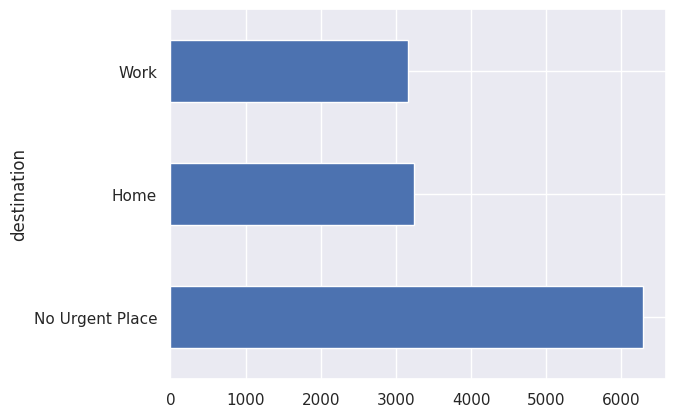

In [11]:
df['destination'].value_counts().plot(kind='barh')

In [12]:
destination = df.groupby(['destination', 'Y']).size().unstack()
destination

Y,0,1
destination,,
Home,1598,1639
No Urgent Place,2301,3982
Work,1575,1589


From this we can see that there is a split between "No Urgent Place" and the other two categories of "Work" and "Home". This is a good indicator that the coupons are being spread at different times of the day and during different days of the week. As well, we see almost a 50/50 split within the outcome based on the value of the persons destination.

#### Weather

<Axes: ylabel='weather'>

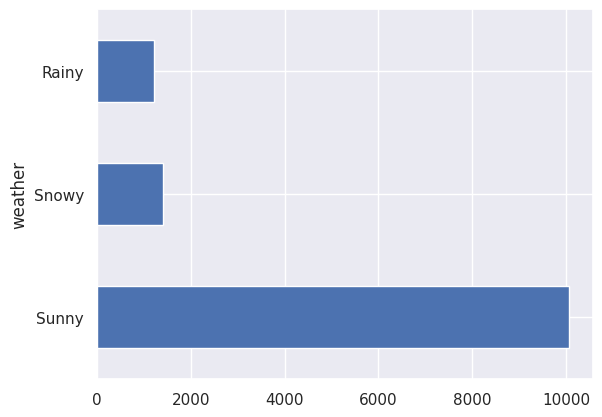

In [13]:
df['weather'].value_counts().plot(kind='barh')

In [14]:
weather = df.groupby(['weather', 'Y']).size().unstack()
weather

Y,0,1
weather,,
Rainy,650,560
Snowy,744,661
Sunny,4080,5989


There is about a 50/50 split for people accepting the coupon based on the weather, so we can see that there is no direct correlation between the two visalized features above.

#### toCoupon_GEQ5min

<Axes: ylabel='toCoupon_GEQ5min'>

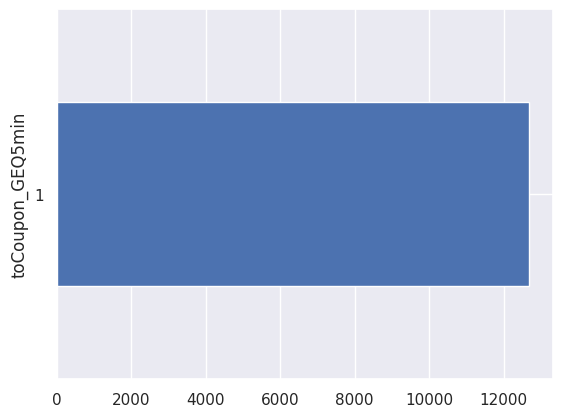

In [15]:
df['toCoupon_GEQ5min'].value_counts().plot(kind='barh')

The values of `toCoupon_GEQ5min` are all 1 so we can drop this column as it does not provide valuable data. 

In [16]:
df = df.drop(columns=['toCoupon_GEQ5min'])

Now we have 23 features to work with.

# Categorical string to int
We need to change all string categorical data into integer. I utilized the LabelEncoder function in sklearn to do this instead of manually mapping each instance to a value.

In [17]:
dtypes = df.dtypes #Data Types for each column
columns = df.columns # Columns in dataframe
for x in columns:
    if dtypes[x] == object: #If the values are not continous
        print("Column:",x, '\n', " String categories:",df[x].unique()) #Print old string categories
        le = preprocessing.LabelEncoder() #Init LabelEncoder
        le.fit(df[x].unique()) #Fit it with the unique values in the dataframe column
        df[x] = le.transform(df[x]) #Transform them into their integer values
        print( "  Int categories:",df[x].unique()) #Print new values

Column: destination 
  String categories: ['No Urgent Place' 'Home' 'Work']
  Int categories: [1 0 2]
Column: passanger 
  String categories: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
  Int categories: [0 1 2 3]
Column: weather 
  String categories: ['Sunny' 'Rainy' 'Snowy']
  Int categories: [2 0 1]
Column: time 
  String categories: ['2PM' '10AM' '6PM' '7AM' '10PM']
  Int categories: [2 0 3 4 1]
Column: coupon 
  String categories: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
  Int categories: [4 2 1 0 3]
Column: expiration 
  String categories: ['1d' '2h']
  Int categories: [0 1]
Column: gender 
  String categories: ['Female' 'Male']
  Int categories: [0 1]
Column: age 
  String categories: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
  Int categories: [0 5 1 2 4 6 3 7]
Column: maritalStatus 
  String categories: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
  Int categories: [3 2 1 0 4]
Column: education 
  Strin

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   destination           12684 non-null  int64
 1   passanger             12684 non-null  int64
 2   weather               12684 non-null  int64
 3   temperature           12684 non-null  int64
 4   time                  12684 non-null  int64
 5   coupon                12684 non-null  int64
 6   expiration            12684 non-null  int64
 7   gender                12684 non-null  int64
 8   age                   12684 non-null  int64
 9   maritalStatus         12684 non-null  int64
 10  has_children          12684 non-null  int64
 11  education             12684 non-null  int64
 12  occupation            12684 non-null  int64
 13  income                12684 non-null  int64
 14  Bar                   12684 non-null  int64
 15  CoffeeHouse           12684 non-null  int64
 16  Carr

Now we have all our columns in numerical form with both continous and categorical data. 

# Data Correlation
Lets test the correlation between the data and find the most correlated feature to our result

<Axes: >

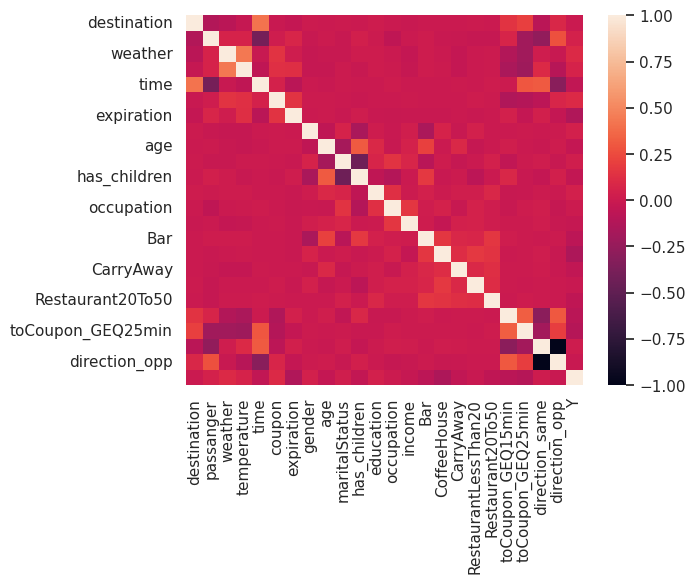

In [19]:
sns.heatmap(df.corr()) #Heatmap for correlations in dataframe

In [20]:
#Y is the last column/row in the correlation above, we can quantify it below:
correlation = df.corr()['Y']
print(correlation.sort_values(ascending=False))

Y                       1.000000
weather                 0.098800
coupon                  0.097019
temperature             0.061240
passanger               0.051614
gender                  0.043969
education               0.043023
maritalStatus           0.025083
direction_same          0.014570
occupation              0.007521
destination            -0.001906
RestaurantLessThan20   -0.011137
direction_opp          -0.014570
income                 -0.023949
age                    -0.035241
has_children           -0.045557
time                   -0.047377
CarryAway              -0.048717
Restaurant20To50       -0.056268
Bar                    -0.076033
toCoupon_GEQ15min      -0.081602
toCoupon_GEQ25min      -0.103633
expiration             -0.129920
CoffeeHouse            -0.144629
Name: Y, dtype: float64


Even the most correlated feature is not correlated enough to utilize a Linear model, but lets test it with some of the features:

In [21]:
model = smf.ols(formula='Y ~ weather + coupon + CoffeeHouse ', data=df)
 
res = model.fit() #update this value according to the result
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     164.4
Date:                Wed, 21 May 2025   Prob (F-statistic):          1.55e-104
Time:                        03:49:27   Log-Likelihood:                -8844.0
No. Observations:               12684   AIC:                         1.770e+04
Df Residuals:                   12680   BIC:                         1.773e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4889      0.015     33.555      

Above is a Linear Model for testing the highest correlated features, even then we don't have enough to predict future values based solely on `weather`, `coupon`, and `expiration`. So we need to use Decision Tree Classifier to have the best use of all features.

# Decision Tree Classifier

First, we move the features and the result into x and y respectively

In [22]:
#Split data into parameters and result 
x = df.drop(columns='Y').copy()
y = df[['Y']].copy()

print(x.info())
# print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   destination           12684 non-null  int64
 1   passanger             12684 non-null  int64
 2   weather               12684 non-null  int64
 3   temperature           12684 non-null  int64
 4   time                  12684 non-null  int64
 5   coupon                12684 non-null  int64
 6   expiration            12684 non-null  int64
 7   gender                12684 non-null  int64
 8   age                   12684 non-null  int64
 9   maritalStatus         12684 non-null  int64
 10  has_children          12684 non-null  int64
 11  education             12684 non-null  int64
 12  occupation            12684 non-null  int64
 13  income                12684 non-null  int64
 14  Bar                   12684 non-null  int64
 15  CoffeeHouse           12684 non-null  int64
 16  Carr

Then we provide a 80/20 split for trainging and testing data

In [23]:
#Split data into training and testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)


In [24]:
x_train

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
3403,2,0,2,55,4,2,1,1,6,1,...,3,4,3,2,2,0,1,0,0,1
1019,1,1,2,80,2,4,0,0,6,0,...,1,0,1,1,1,3,1,0,0,1
5575,1,2,2,55,3,2,0,1,3,1,...,7,3,3,3,0,3,1,0,0,1
9600,1,1,2,30,1,1,0,0,0,3,...,5,3,4,0,3,4,1,0,0,1
10029,2,0,2,80,4,4,0,1,1,2,...,2,1,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5014,1,3,2,80,3,4,0,0,2,1,...,4,4,4,0,2,0,0,0,0,1
8152,1,1,1,30,0,1,0,0,5,3,...,0,4,3,3,0,3,1,0,0,1
9514,1,0,1,30,2,0,0,1,2,3,...,1,4,3,0,0,4,0,0,0,1
1768,1,1,2,80,2,2,1,1,0,3,...,1,1,0,1,1,0,1,0,0,1


With the data ready, we can then run random parameters on the DTC and view the accuracy score

In [25]:
#Decision Tree Classifier with random initial parameters 
classifier = DecisionTreeClassifier(max_depth=10, random_state=14)
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
acc_score = accuracy_score(y_true=y_test, y_pred = pred)

print("Accuracy Score for initial DTC:", acc_score)

Accuracy Score for initial DTC: 0.7114702404414663


An accuracy score of 69% is nice for random initial values but we can get a better score by modifying our parameters, we can run GridSearchCV to search for the best values to give us the best Accuracy of the model

In [26]:
parameters = {'max_depth' : np.arange(3,10),
             'criterion': ['gini', 'entropy'],
              'max_leaf_nodes' : [5,10,15,20,50,100],
              'min_samples_split' : [2,4,5,10,15,20]
             }
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), parameters, scoring="accuracy")

grid_search_tree.fit(x_train, y_train)

print("Best Estimator values:", grid_search_tree.best_estimator_)

print('Best Score:', np.abs(grid_search_tree.best_score_))

Best Estimator values: DecisionTreeClassifier(max_depth=9, max_leaf_nodes=100)
Best Score: 0.7033595136530165


With the best parameters provided to us above, we can then use that model to predict the test data and get the accuracy score

In [27]:
#Testing the best scoring parameters from above with test value:

classifier = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

classifier.fit(x_train, y_train)
pred = classifier.predict(x_test) 
acc_score = accuracy_score(y_true=y_test, y_pred = pred)
f_score = f1_score(y_true=y_test, y_pred=pred)
print("Accuracy Score Optimized Parameters:", acc_score)
print("F1 Score Optimized Parameters:", f_score)


Accuracy Score Optimized Parameters: 0.7205360662199448
F1 Score Optimized Parameters: 0.7715114405414115


With the test data we get around the same accuracy score, now lets look at the most important features below:

In [28]:
#Feature importance
features = x.columns
scores = classifier.feature_importances_.tolist()
res = pd.DataFrame({'features' : features, 'score': scores})
res = res.sort_values(by=['score'], ascending=False)
print(res)

                features     score
5                 coupon  0.332876
15           CoffeeHouse  0.119305
14                   Bar  0.101596
6             expiration  0.071651
4                   time  0.062280
20     toCoupon_GEQ25min  0.053991
8                    age  0.035482
12            occupation  0.029847
1              passanger  0.027035
2                weather  0.017961
13                income  0.016583
11             education  0.014973
22         direction_opp  0.014912
21        direction_same  0.013443
19     toCoupon_GEQ15min  0.013362
10          has_children  0.012391
0            destination  0.012047
7                 gender  0.011549
18      Restaurant20To50  0.010977
9          maritalStatus  0.009335
16             CarryAway  0.008791
3            temperature  0.006299
17  RestaurantLessThan20  0.003315


We can thus conclude that the most important identifier from the Decision Tree Classifier model is the type of coupon that is presented to the customer, the frequency the person accepting the coupon goes to a Coffe House within a month, and if the driving time to the establishment is >=25 minutes.

We can see how our models accuracy will be if we choose the top 1, 2, 3 features provided above. 

In [29]:
#models with top 1, 2, & 3 features
top_1 = df[['coupon']].copy()
top_2 = df[['coupon', 'Bar']].copy()
top_3 = df[['coupon', 'Bar', 'income']].copy()

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(top_1,y, test_size=.2)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(top_2,y, test_size=.2)
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(top_3,y, test_size=.2)

classifier.fit(x_train_1, y_train_1)
pred1 = classifier.predict(x_test_1)
acc_score1 = accuracy_score(y_true=y_test_1, y_pred = pred1)
print("With the top (1) feature, accuracy score = ", acc_score1)

classifier.fit(x_train_2, y_train_2)
pred2 = classifier.predict(x_test_2)
acc_score2 = accuracy_score(y_true=y_test_2, y_pred = pred2)
print("With the top (2) features, accuracy score = ", acc_score2)

classifier.fit(x_train_3, y_train_3)
pred3 = classifier.predict(x_test_3)
acc_score3 = accuracy_score(y_true=y_test_3, y_pred = pred3)
print("With the top (3) features, accuracy score = ", acc_score3)

With the top (1) feature, accuracy score =  0.62238864800946
With the top (2) features, accuracy score =  0.635001970831691
With the top (3) features, accuracy score =  0.6302719747733544


Accuracy fluctuates with the addition of additional parameters. But, there is an increase in accuracy as we add more features.

## Confusion Matrix 
For the optimized DTC model we created above, we want to view how we can improve the values of FN and FP. First lets view the amounts for those:

In [30]:
#Confusion Matrix
cm = sklearn.metrics.confusion_matrix(y_test, pred)
print(cm)

TP = 0
FP = 0
TN = 0
FN = 0

y_true = y_test.values.tolist()
pos_label_value = 1
for l in range(len(pred)):
    predicted = pred[l]
    true = y_true[l][0]
    if predicted == pos_label_value and true == pos_label_value:
        TP += 1
    elif predicted == pos_label_value and true != pos_label_value:
        FP += 1
    elif predicted != pos_label_value and true == pos_label_value:
        FN += 1
    elif predicted != pos_label_value and true != pos_label_value:
        TN += 1
print("TP = ", TP)
print("FP = ", FP)
print("TN = ", TN)
print("FN = ", FN)

[[ 631  443]
 [ 266 1197]]
TP =  1197
FP =  443
TN =  631
FN =  266


To improve those amounts we can change the GridSearchCV scoring to f1 instead of accuracy to the predictions. This should help us to predict the TP and TN values a bit better. 

In [31]:
parameters = {'max_depth' : np.arange(3,10),
             'criterion': ['gini', 'entropy'],
              'max_leaf_nodes' : [5,10,15,20,50,100],
              'min_samples_split' : [2,4,5,10,15,20]
             }
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), parameters, scoring="f1")

grid_search_tree.fit(x_train, y_train)

print("Best Estimator values:", grid_search_tree.best_estimator_)

print('Best Score:', np.abs(grid_search_tree.best_score_))

Best Estimator values: DecisionTreeClassifier(max_depth=9, max_leaf_nodes=100, min_samples_split=5)
Best Score: 0.7534788384546482


In [32]:
classifier = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=50,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
acc_score = accuracy_score(y_true=y_test, y_pred = pred)
f_score = f1_score(y_true=y_test, y_pred=pred)
print("Accuracy Score Optimized Parameters:", acc_score)
print("F1 Score Optimized Parameters:", f_score)

Accuracy Score Optimized Parameters: 0.7169885691761924
F1 Score Optimized Parameters: 0.7650523560209423


In [33]:
features = x_train.columns
scores = classifier.feature_importances_.tolist()
res = pd.DataFrame({'features' : features, 'score': scores})
res = res.sort_values(by=['score'], ascending=False)
print(res)

                features     score
5                 coupon  0.379162
15           CoffeeHouse  0.127754
14                   Bar  0.109273
6             expiration  0.082684
20     toCoupon_GEQ25min  0.064793
4                   time  0.059544
2                weather  0.021554
1              passanger  0.020890
0            destination  0.018505
21        direction_same  0.017895
12            occupation  0.016547
22         direction_opp  0.016132
8                    age  0.012425
11             education  0.010850
10          has_children  0.010401
7                 gender  0.009051
13                income  0.006765
19     toCoupon_GEQ15min  0.006690
3            temperature  0.004606
16             CarryAway  0.004477
9          maritalStatus  0.000000
17  RestaurantLessThan20  0.000000
18      Restaurant20To50  0.000000


In [34]:
#Confusion Matrix
cm = sklearn.metrics.confusion_matrix(y_test, pred)
print(cm)

TP_new = 0
FP_new = 0
TN_new = 0
FN_new = 0

y_true = y_test.values.tolist()
pos_label_value = 1
for x in range(len(pred)):
    predicted = pred[x]
    true = y_true[x][0]
    if predicted == pos_label_value and true == pos_label_value:
        TP_new += 1
    elif predicted == pos_label_value and true != pos_label_value:
        FP_new += 1
    elif predicted != pos_label_value and true == pos_label_value:
        FN_new += 1
    elif predicted != pos_label_value and true != pos_label_value:
        TN_new += 1
print("New TP = ", TP_new)
print("New FP = ", FP_new)
print("New TN = ", TN_new)
print("New FN = ", FN_new)


[[ 650  424]
 [ 294 1169]]
New TP =  1169
New FP =  424
New TN =  650
New FN =  294


To compare those values we can see the following:

TP =  1136, New TP =  1159

FP =  423, New FP =  467

TN =  649, New TN =  605

FN =  329, New FN =  306

Both False Negatives and true Negatives decreased, while False Positives and True Positives increased. This may be a favorable for this model and dataset as we prefer to include more people into positive to provide them with the ability to accept the coupon despite them being a possible negative as they may be persuaded by further external factors not included in this dataset. 

### Feature Engineering
For this I want to remove all personal traits, and focus on observable features. 

I will start with combining direction_opp and direction_same into one column with different values:

In [35]:
fe_df = df.copy()
fe_df['direction'] = 0
fe_df.loc[((fe_df.direction_opp == 1) & (fe_df.direction_same == 0)), 'direction'] = 0 # Opposite direction
fe_df.loc[((fe_df.direction_opp == 0) & (fe_df.direction_same == 1)), 'direction'] = 1 # Same direction
fe_df = fe_df.drop(columns=['direction_same', 'direction_opp'])

Next we will make the passenger column to be a binary, to make it more of an observable feature:

In [36]:
fe_df['b_passanger'] = 0
fe_df.loc[((fe_df['passanger'] == 0), 'b_passanger')] = 0
fe_df.loc[((fe_df['passanger'] == 1) | (fe_df['passanger'] == 2) | (fe_df['passanger'] == 3), 'b_passanger')] = 1
fe_df = fe_df.drop(columns=['passanger'])
fe_df = fe_df.rename(columns={'b_passanger' : 'new_passanger'})

Finally, we want to combine the columns `toCoupon_GEQ15min` and `toCoupon_GEQ25min`:

In [37]:
fe_df['toCoupon'] = 0
fe_df.loc[((fe_df['toCoupon_GEQ15min'] == 0) & (fe_df['toCoupon_GEQ25min'] == 0), 'toCoupon')] = 0 # Less than 15 mins
fe_df.loc[((fe_df['toCoupon_GEQ15min'] == 1) & (fe_df['toCoupon_GEQ25min'] == 0), 'toCoupon')] = 1 # between 15 and 25
fe_df.loc[((fe_df['toCoupon_GEQ15min'] == 1) & (fe_df['toCoupon_GEQ25min'] == 1), 'toCoupon')] = 2 # Greater than 25
fe_df = fe_df.drop(columns=['toCoupon_GEQ15min', 'toCoupon_GEQ25min'])

In [38]:
fe_df = fe_df[['destination', 'new_passanger', 'weather', 'temperature', 'direction', 'time', 'coupon', 'expiration', 'toCoupon', 'Y']].copy()

In [39]:
fe_df.head()

,destination,new_passanger,weather,temperature,direction,time,coupon,expiration,toCoupon,Y
0,1,0,2,55,0,2,4,0,0,1
1,1,1,2,80,0,0,2,1,0,0
2,1,1,2,80,0,0,1,1,1,1
3,1,1,2,80,0,2,2,1,1,0
4,1,1,2,80,0,2,2,0,1,0


## Feature Engineered visualization

Lets take a look into the combined columns:

<Axes: ylabel='direction'>

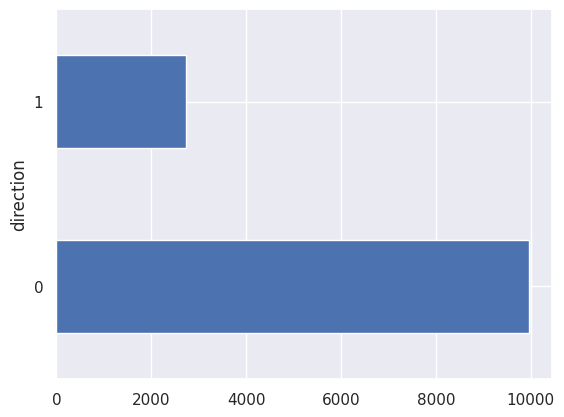

In [40]:
fe_df['direction'].value_counts().plot(kind='barh')

In [41]:
direction = fe_df.groupby(['direction', 'Y']).size().unstack()
direction

Y,0,1
direction,,
0,4336,5624
1,1138,1586


<Axes: ylabel='new_passanger'>

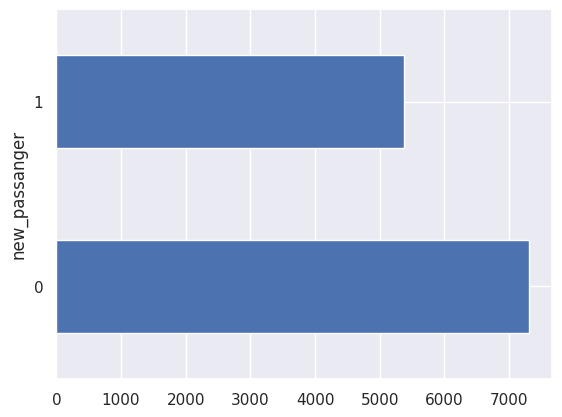

In [42]:
fe_df['new_passanger'].value_counts().plot(kind='barh')

In [43]:
passanger = fe_df.groupby(['new_passanger', 'Y']).size().unstack()
passanger

Y,0,1
new_passanger,,
0,3464,3841
1,2010,3369


### Re-run model on new dataset

In [44]:
fe_x = fe_df.drop(columns='Y').copy()
fe_y = fe_df[['Y']].copy()

In [45]:
x_train, x_test, y_train, y_test = train_test_split(fe_x, fe_y, train_size=0.8)

In [46]:
parameters = {'max_depth' : np.arange(3,10),
             'criterion': ['gini', 'entropy'],
              'max_leaf_nodes' : [5,10,15,20,50,100],
              'min_samples_split' : [2,4,5,10,15,20]
             }
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), parameters, scoring="accuracy")

grid_search_tree.fit(x_train, y_train)

print("Best Estimator values:", grid_search_tree.best_estimator_)

print('Best Score:', np.abs(grid_search_tree.best_score_))

Best Estimator values: DecisionTreeClassifier(max_depth=9, max_leaf_nodes=100)
Best Score: 0.6742877051230071


In [47]:
classifier = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
acc_score = accuracy_score(y_true=y_test, y_pred = pred)
f_score = f1_score(y_true=y_test, y_pred=pred)
print("Accuracy Score Optimized Parameters:", acc_score)
print("F1 Score Optimized Parameters:", f_score)

Accuracy Score Optimized Parameters: 0.6523452897122586
F1 Score Optimized Parameters: 0.6977381768334475


In [48]:
features = x_train.columns
scores = classifier.feature_importances_.tolist()
res = pd.DataFrame({'features' : features, 'score': scores})
res = res.sort_values(by=['score'], ascending=False)
print("Feature importance")
print(res)

Feature importance
        features     score
6         coupon  0.403972
5           time  0.169917
8       toCoupon  0.134062
7     expiration  0.121757
2        weather  0.036680
4      direction  0.034988
1  new_passanger  0.034749
0    destination  0.032017
3    temperature  0.031858


In [49]:
cm = sklearn.metrics.confusion_matrix(y_test, pred)
print(cm)

fe_TP = 0
fe_FP = 0
fe_TN = 0
fe_FN = 0

y_true = y_test.values.tolist()
pos_label_value = 1
for x in range(len(pred)):
    predicted = pred[x]
    true = y_true[x][0]
    if predicted == pos_label_value and true == pos_label_value:
        fe_TP += 1
    elif predicted == pos_label_value and true != pos_label_value:
        fe_FP += 1
    elif predicted != pos_label_value and true == pos_label_value:
        fe_FN += 1
    elif predicted != pos_label_value and true != pos_label_value:
        fe_TN += 1
print("With max accuracy we get:")
print("FE Acc TP = ", fe_TP)
print("FE Acc FP = ", fe_FP)
print("FE Acc TN = ", fe_TN)
print("FE Acc FN = ", fe_FN)

[[ 637  474]
 [ 408 1018]]
With max accuracy we get:
FE Acc TP =  1018
FE Acc FP =  474
FE Acc TN =  637
FE Acc FN =  408


In [50]:
parameters = {'max_depth' : np.arange(3,10),
             'criterion': ['gini', 'entropy'],
              'max_leaf_nodes' : [5,10,15,20,50,100],
              'min_samples_split' : [2,4,5,10,15,20]
             }
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), parameters, scoring="f1")

grid_search_tree.fit(x_train, y_train)

print("Best Estimator values:", grid_search_tree.best_estimator_)

print('Best Score:', np.abs(grid_search_tree.best_score_))

Best Estimator values: DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20)
Best Score: 0.7290040489300399


In [51]:
classifier = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=50,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
acc_score = accuracy_score(y_true=y_test, y_pred = pred)
f_score = f1_score(y_true=y_test, y_pred=pred)
print("Accuracy Score Optimized Parameters:", acc_score)
print("F1 Score Optimized Parameters:", f_score)

Accuracy Score Optimized Parameters: 0.6507686243594797
F1 Score Optimized Parameters: 0.7034805890227577


In [52]:
features = x_train.columns
scores = classifier.feature_importances_.tolist()
res = pd.DataFrame({'features' : features, 'score': scores})
res = res.sort_values(by=['score'], ascending=False)
print("Feature importance")
print(res)

Feature importance
        features     score
6         coupon  0.426034
5           time  0.152073
8       toCoupon  0.137640
7     expiration  0.134942
0    destination  0.039610
2        weather  0.030444
1  new_passanger  0.030202
3    temperature  0.024682
4      direction  0.024373


In [53]:
cm = sklearn.metrics.confusion_matrix(y_test, pred)
print(cm)

fe_TP = 0
fe_FP = 0
fe_TN = 0
fe_FN = 0

y_true = y_test.values.tolist()
pos_label_value = 1
for x in range(len(pred)):
    predicted = pred[x]
    true = y_true[x][0]
    if predicted == pos_label_value and true == pos_label_value:
        fe_TP += 1
    elif predicted == pos_label_value and true != pos_label_value:
        fe_FP += 1
    elif predicted != pos_label_value and true == pos_label_value:
        fe_FN += 1
    elif predicted != pos_label_value and true != pos_label_value:
        fe_TN += 1
print("With max f1 we get:")
print("FE f1 TP = ", fe_TP)
print("FE f1 FP = ", fe_FP)
print("FE f1 TN = ", fe_TN)
print("FE f1 FN = ", fe_FN)

[[ 600  511]
 [ 375 1051]]
With max f1 we get:
FE f1 TP =  1051
FE f1 FP =  511
FE f1 TN =  600
FE f1 FN =  375


Now that we only ran our model on observable features, we can see that the model improved, and will help the people passing out the coupons to use their observation skills, and decision for time and direction to pass out the coupons more effectively to people that are more likely to 

# Conclusions

The model before feature engineering may not be the best even after the changes made to be more focused on f1-score rather than accuracy. But, having more positives than negatives in this situation is not the worse as it would lead to more wasted time of offering coupons to those that may not accept them, but it also will lead to more true positive outcomes. 

After choosing only the obersable features we got a worse model, but unless we have a camera that views into the car and gives us the backstory and details for each person it will not be a practical model. This way we can provide those employees with the insight into what factors that they can observe to offer a coupon to a driver that is more likely to accept a coupon and improve their effeciency. 

To improve this we might need to choose a different model that uses weights on each feature to have better insight into which feature will impact the customer not accepting more. I would recommend a bayesian model as well. 

## Github link for this file :
[https://github.com/kirkboyd1/SupervisedLearningFinal/blob/main/Final_Project.ipynb](http://)